<a href="https://colab.research.google.com/github/its-rajesh/Programming-Practicum/blob/main/SignalClassV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SIGNAL CLASS**

### Imports

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import librosa
import soundfile

### Signal class

In [ ]:
class signal():

  '''
  Constructor: Two types
  1. Generation of basic signals
  2. loading own audio file
  '''
  def __init__(self, *args):

    if len(args) == 2:
      self.data = args[0]
      self.fs = args[1]
      self.duration = len(self.data)//self.fs
      self.signal_type = 'loaded'

    else:
      self.fs = args[0]
      self.duration = args[1]
      self.signal_type = args[2]

      self.t = np.arange(0, self.duration*1, 1/self.fs)
      
      if self.signal_type == 'sin':
        self.data = np.sin(2*np.pi*self.t)
      elif self.signal_type == 'cos':
        self.data = np.cos(2*np.pi*self.t)

  '''
  Add Magic Method: Adds two signals only if its duration and sampling frequency are equal
  '''
  def __add__(self, s2):
    if self.fs == s2.fs and self.duration == s2.duration:
      return self.data + s2.data, self.fs
    else:
      print("ERROR! Sampling frequency (hz) or duration (sec) mismatch")

  '''
  Multiplication Magic Method: does scalar amplitude multiplication
  '''
  def __mul__(self, val):
    return self.data * val, self.fs

  '''
  Division Magic Method: does scalar amplitude division
  '''
  def __truediv__(self, val):
    try:
      result = self.data/val, self.fs
    except:
      print("Cannot be divided by zero")
    return result 

  '''
  Subraction Magic Method: Subtracts two signals only if its duration and sampling frequency are equal
  '''
  def __sub__(self, s2):
    if self.fs == s2.fs and self.duration == s2.duration:
      return self.data - s2.data, self.fs
    else:
      print("ERROR! Sampling frequency (hz) or duration (sec) mismatch")

  '''
  Time Inversion Magic Method: Invert the time axis
  '''
  def timeinversion(self):
    return self.data[::-1], self.fs

  '''
  Extact Magic Method: Clips certain portion of the signal
  '''
  def extract(self, start, end):
    return self.data[int(start*self.fs):int(end*self.fs)], self.fs


  '''
  Timescaling Magic Method: Performs compression or expansion of signal
  '''
  def timescale(self, factor):
    if self.signal_type == 'sin':
      self.scaled_data = np.sin(factor*2*np.pi*self.t)
    elif self.signal_type == 'cos':
      self.scaled_data = np.cos(factor*2*np.pi*self.t)
    elif self.signal_type == 'loaded':
      if factor >= 1:
        self.scaled_data = self.data[::factor]
      elif factor < 1 and factor > 0:
        self.scaled_data = self.data[::factor]
    return self.scaled_data, self.fs

### Plotting Function

In [ ]:
def plot_signal(y, fs):
  x = np.arange(len(y))
  plt.plot(x/fs, y)
  plt.show()

### Basic Signal Operations

**Useage: signal(fs, duration, signal_type)**

fs = sampling frequency

duration = signal duration in seconds

signal_type = 'sin' or 'cos'

In [ ]:
s1 = signal(100, 5, 'sin')
s1.fs, len(s1.data)

(100, 500)

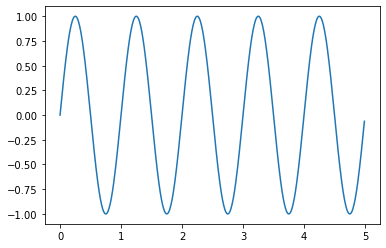

In [ ]:
plot_signal(s1.data, s1.fs)

In [ ]:
s2 = signal(100, 5, 'cos')

In [ ]:
s3 = signal(100, 1, 'cos')

Signal Addition

In [ ]:
s3+s1

ERROR! Sampling frequency (hz) or duration (sec) mismatch


Signal Subtraction

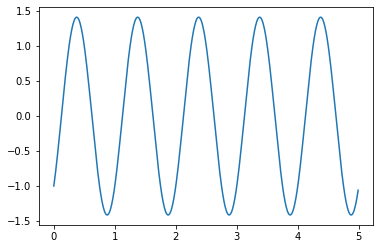

In [ ]:
res = s1-s2

plot_signal(res[0], res[1])

Time Scaling: Compression

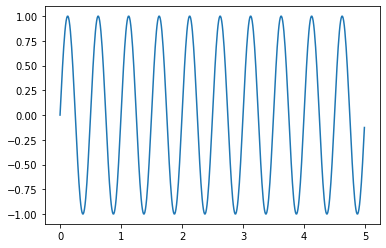

In [ ]:
s4 = s1.timescale(2)

plot_signal(s4[0], s4[1])

Time Scaling: Expansion

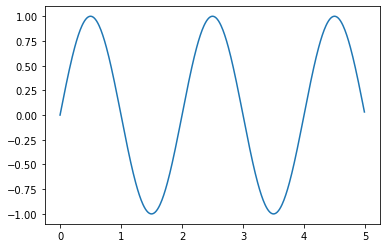

In [ ]:
s4 = s1.timescale(0.5)

plot_signal(s4[0], s4[1])

Clipping Signals

Useage:

signal_object.extract(start, end)

start and end time in seconds

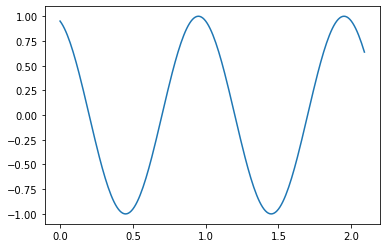

In [ ]:
s6 = s1.extract(1.3, 3.4)

plot_signal(s6[0], s6[1])

Time Inversion

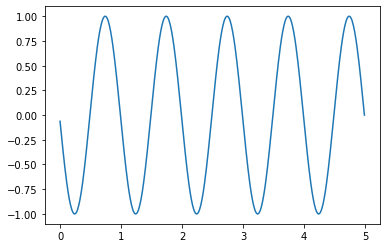

In [ ]:
s7 = s1.timeinversion()

plot_signal(s7[0], s7[1])

### Working with Read Audio Signal

In [ ]:
from google.colab import drive
drive.mount('/drive')

audio_path = '/drive/My Drive/Projects/Music-Speech-Separation/Dataset/Mixture/'

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
y1, fs1 = librosa.load(audio_path+'1.wav')
y2, fs2 = librosa.load(audio_path+'2.wav')

Useage:

signal(data, fs)

use only two arguments

In [ ]:
loaded_s1 = signal(y1, fs1)
loaded_s2 = signal(y2, fs2)

Addition

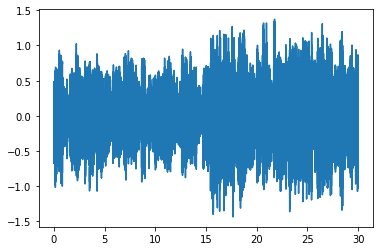

In [ ]:
added = loaded_s1+loaded_s2

plot_signal(added[0], added[1])

Division

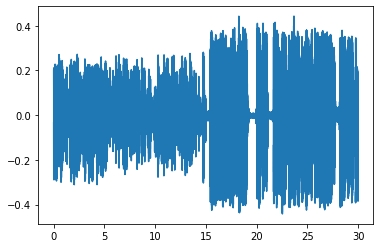

In [ ]:
y3 = loaded_s1/2

plot_signal(y3[0], y3[1])

Inversion

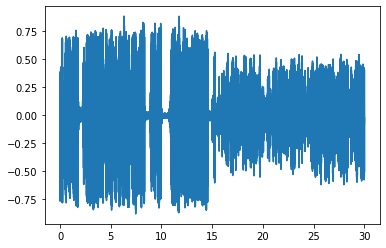

In [ ]:
y4 = loaded_s1.timeinversion()

plot_signal(y4[0], y4[1])

Clip Audio signal

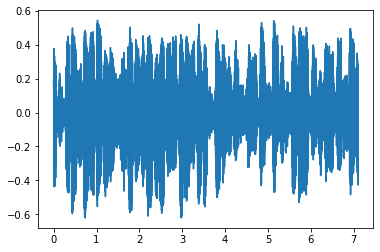

In [ ]:
y5 = loaded_s1.extract(1.3, 8.4)

plot_signal(y5[0], y5[1])